#New simple defination

CIRCUIT BREAKER STOCK - If stock price return is more than
4.5% in a day closing, comparing to the previous day closing price, we refer that stock as a circuit breaker stock for that day.

In [1]:
pip install yfinance

In [99]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr
import numpy as np

In [100]:
yf.pdr_override()
data = pdr.get_data_yahoo('SALASAR.NS', start='2016-01-01', end='2022-12-31',interval="1d")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-25,12.500000,13.125000,12.500000,13.125000,12.159729,14596640
2017-07-26,13.780000,13.780000,13.780000,13.780000,12.766556,218920
2017-07-27,14.467500,14.467500,13.092500,13.092500,12.129616,7730860
2017-07-28,12.440000,12.440000,12.440000,12.440000,11.525105,303380
2017-07-31,11.820000,12.490000,11.820000,12.235000,11.335182,11267860
...,...,...,...,...,...,...
2022-12-26,43.950001,46.500000,42.549999,46.500000,46.500000,1557080
2022-12-27,46.900002,48.799999,46.000000,48.549999,48.549999,1125642
2022-12-28,48.500000,50.950001,47.299999,50.900002,50.900002,2382225


In [101]:

data["Tomorrow"] = data["Close"].shift(-1)
data

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2017-07-25,12.500000,13.125000,12.500000,13.125000,12.159729,14596640,13.780000
2017-07-26,13.780000,13.780000,13.780000,13.780000,12.766556,218920,13.092500
2017-07-27,14.467500,14.467500,13.092500,13.092500,12.129616,7730860,12.440000
2017-07-28,12.440000,12.440000,12.440000,12.440000,11.525105,303380,12.235000
2017-07-31,11.820000,12.490000,11.820000,12.235000,11.335182,11267860,12.717500
...,...,...,...,...,...,...,...
2022-12-26,43.950001,46.500000,42.549999,46.500000,46.500000,1557080,48.549999
2022-12-27,46.900002,48.799999,46.000000,48.549999,48.549999,1125642,50.900002
2022-12-28,48.500000,50.950001,47.299999,50.900002,50.900002,2382225,53.400002


In [102]:
data["per_diff"]= ((data["Tomorrow"] -  data["Close"])/data['Close']) * 100
data

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,per_diff
Date,,,,,,,,
2017-07-25,12.500000,13.125000,12.500000,13.125000,12.159729,14596640,13.780000,4.990474
2017-07-26,13.780000,13.780000,13.780000,13.780000,12.766556,218920,13.092500,-4.989115
2017-07-27,14.467500,14.467500,13.092500,13.092500,12.129616,7730860,12.440000,-4.983771
2017-07-28,12.440000,12.440000,12.440000,12.440000,11.525105,303380,12.235000,-1.647909
2017-07-31,11.820000,12.490000,11.820000,12.235000,11.335182,11267860,12.717500,3.943605
...,...,...,...,...,...,...,...,...
2022-12-26,43.950001,46.500000,42.549999,46.500000,46.500000,1557080,48.549999,4.408601
2022-12-27,46.900002,48.799999,46.000000,48.549999,48.549999,1125642,50.900002,4.840376
2022-12-28,48.500000,50.950001,47.299999,50.900002,50.900002,2382225,53.400002,4.911591


In [103]:
data["Target"]= (data["per_diff"] > 4.5).astype(int)

In [104]:
data

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,per_diff,Target
Date,,,,,,,,,
2017-07-25,12.500000,13.125000,12.500000,13.125000,12.159729,14596640,13.780000,4.990474,1
2017-07-26,13.780000,13.780000,13.780000,13.780000,12.766556,218920,13.092500,-4.989115,0
2017-07-27,14.467500,14.467500,13.092500,13.092500,12.129616,7730860,12.440000,-4.983771,0
2017-07-28,12.440000,12.440000,12.440000,12.440000,11.525105,303380,12.235000,-1.647909,0
2017-07-31,11.820000,12.490000,11.820000,12.235000,11.335182,11267860,12.717500,3.943605,0
...,...,...,...,...,...,...,...,...,...
2022-12-26,43.950001,46.500000,42.549999,46.500000,46.500000,1557080,48.549999,4.408601,0
2022-12-27,46.900002,48.799999,46.000000,48.549999,48.549999,1125642,50.900002,4.840376,1
2022-12-28,48.500000,50.950001,47.299999,50.900002,50.900002,2382225,53.400002,4.911591,1


In [105]:
data['Target'].value_counts()

0    1245
1     100
Name: Target, dtype: int64

1--> circuit

0--> Not

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
model = RandomForestClassifier(n_estimators=100, min_samples_split= 500, random_state=1)
train = data.iloc[:-4]
test = data.iloc[-4:]
predictors = ["Close", "Volume", "Open", "High", "Low"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train[predictors])
X_test_scaled = scaler.transform(test[predictors])

model.fit (X_train_scaled, train["Target"])

RandomForestClassifier(min_samples_split=500, random_state=1)

In [113]:
from sklearn.metrics import precision_score
preds=model.predict(X_test_scaled)

In [114]:
preds

array([0, 0, 0, 0])

In [109]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])
preds=pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)
# preds

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

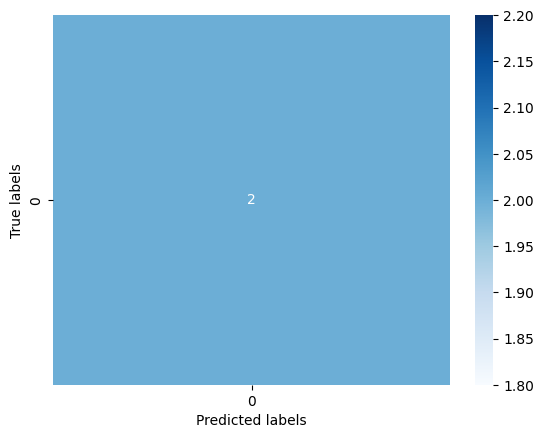

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test["Target"], preds)

# Display confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [111]:
# def predict(train, test, predictors, model):
#     model.fit(train[predictors], train["Target"])
#     preds=model.predict(test[predictors])
#     preds=pd.Series(preds, index=test. index, name="Predictions")
#     combined = pd.concat([test["Target"], preds], axis=1)
#     return combined